# Pandas
* python의 데이터 분석 라이브러리 -> 데이터 테이블을 다루는 도구 (정형 데이터)
* 기본적으로 numpy를 사용

 * numpy : python에서 배열을 다루는 최적의 라이브러리
 * pandas는 numpy를 효율적으로 사용하기 위해 인덱싱, 연산, 전처리 등 다양한 함수 제공

# Pandas의 개념
* Data Frame : 데이터 테이블 전체 객체
* Series : 각 열 데이터를 다루는 객체
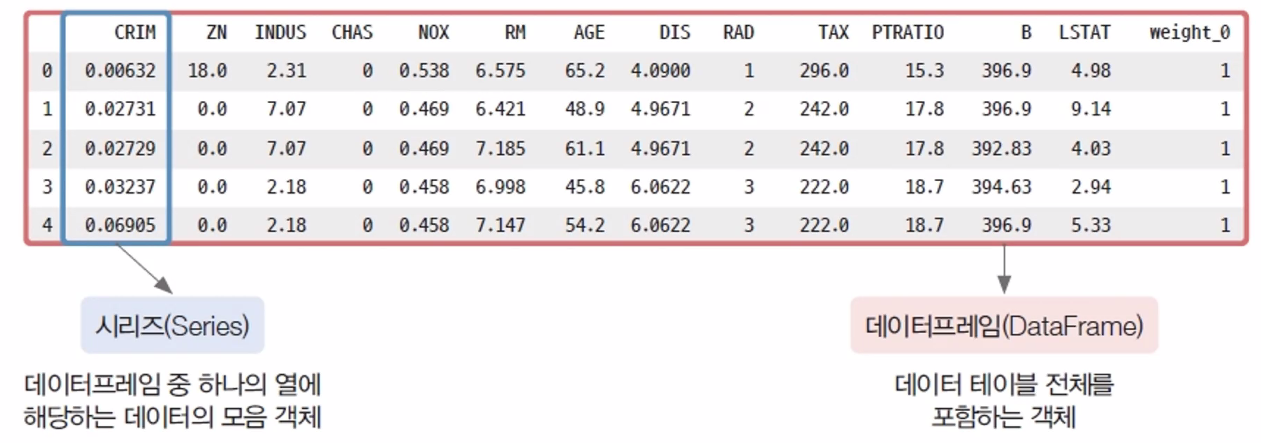

# Series 객체
* Feature Vector 와 같은 개념
* 일반적으로 하나의 피쳐 데이터를 포함하는 형태
* 생성된 데이터 프레임 안에 포함될 수 있음
* list, dict, ndarray 등 다양한 데이터 타입이 시리즈 객체 형태로 변환되기도 함.
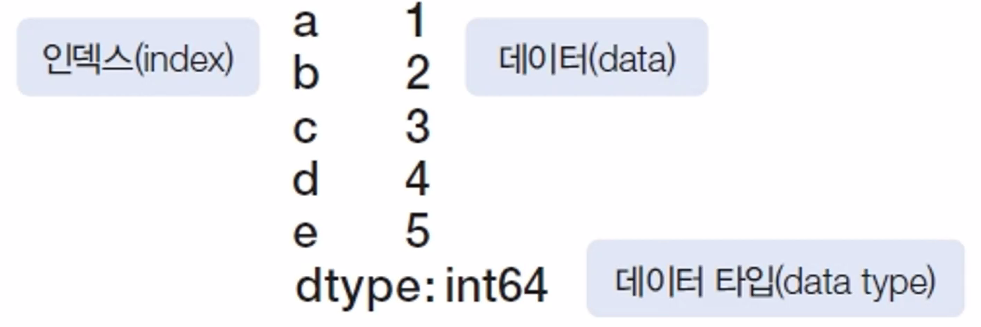

* 시리즈 객체를 생성하면 세 가지 요소(property) 생성
 * Data : 기존 다른 객체처럼 값을 저저장하는 요소
 * Index: 항상 0부터 시작하고, 숫자로만 할당하는 값
   <br>-시리즈 객체에서는 숫자, 문자열, 0 이외의 값으로 시작하는 숫자, 순서가 일정하지 않은 숫자를 입력할 수도 있음
   <br>-시리즈 객체에서는 인덱스 값의 중복을 허용
 * Data type : 넘파이의 데이터 타입과 일정하지 일치
 
* 판다스는 넘파이의 Wrapper 라이브러리
  * 넘파이의 모든 기능 지원하고 데이터 타입도 그대로 적용

## 시리즈 객체 생성
 데이터 프레임 객체를 먼저 생성하고 각 열에서 시리즈 객체를 뽑는 것이 일반적인 방법


* Pandas 모듈 호출

In [ ]:
import pandas as pd
import numpy as np

* List > Series

In [ ]:
list_data = [1,2,3,4,5]
pd.Series(list_data)

0    1
1    2
2    3
3    4
4    5
dtype: int64

* 판다스의 모든 객체는 인덱스 값을 기준으로 생성

In [ ]:
list_data = [1,2,3,4,5]
list_name = ['a', 'b', 'c', 'd', 'e']
pd.Series(data = list_data, index = list_name)

a    1
b    2
c    3
d    4
e    5
dtype: int64

* 기존 데이터에 인덱스 값을 추가하면 NaN값이 출력

In [ ]:
dict_data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
indexes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
pd.Series(dict_data, index = indexes)

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    NaN
g    NaN
h    NaN
dtype: float64

* 다양한 시퀀스형 데이터 타입으로 저장가능

In [ ]:
dict_data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
pd.Series(dict_data, dtype=np.float32)

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float32

* 시리즈 객체 이름 지정하여 저장 가능

In [ ]:
dict_data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
pd.Series(dict_data, dtype=np.float32, name='example_data')

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: example_data, dtype: float32

* 시리즈 정보 확인

In [ ]:
x = pd.Series(dict_data, dtype=np.float32, name='example_data')

In [ ]:
type(x)  # 시리즈의 타입

pandas.core.series.Series

In [ ]:
print(x.values)  # 시리즈의 values
print(x.index)  # 시리즈의 index
print(x.dtype)  # 시리즈의 데이터타입
print(type(x.values))  # 시리즈 values의 타입 
print(x.name)  # 시리즈의 이름

[1. 2. 3. 4. 5.]
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
float32
<class 'numpy.ndarray'>
example_data


* 객체 이름, index 이름 변경

In [ ]:
x.name = "new"  # 객체 이름 변경
x.index.name = "id"  # index의 이름 지정가능
x

id
a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: new, dtype: float32

## 시리즈에서 데이터 추출하기

In [ ]:
print(x[0]) # x의 1번째 원소 선택 
print(x['b']) # b 라벨을 가진 원소 선택

1.0
2.0


In [ ]:
print(x[['c','e']]) # c와 e 원소를 선택
print(x[[2, 4]])

id
c    3.0
e    5.0
Name: new, dtype: float32
id
c    3.0
e    5.0
Name: new, dtype: float32


In [ ]:
print(x['b':'d']) # b에서 d까지의 원소 선택 (python slicing과 달리 end 값이 포함된다)

id
b    2.0
c    3.0
d    4.0
Name: new, dtype: float32


# DataFrame 객체
* 데이터 테이블 전체를 지칭하는 객체
* 넘파이 배열의 특성을 그대로 가짐
* indexing : 열과 행 각각 사용하여 하나의 데이터에 접근


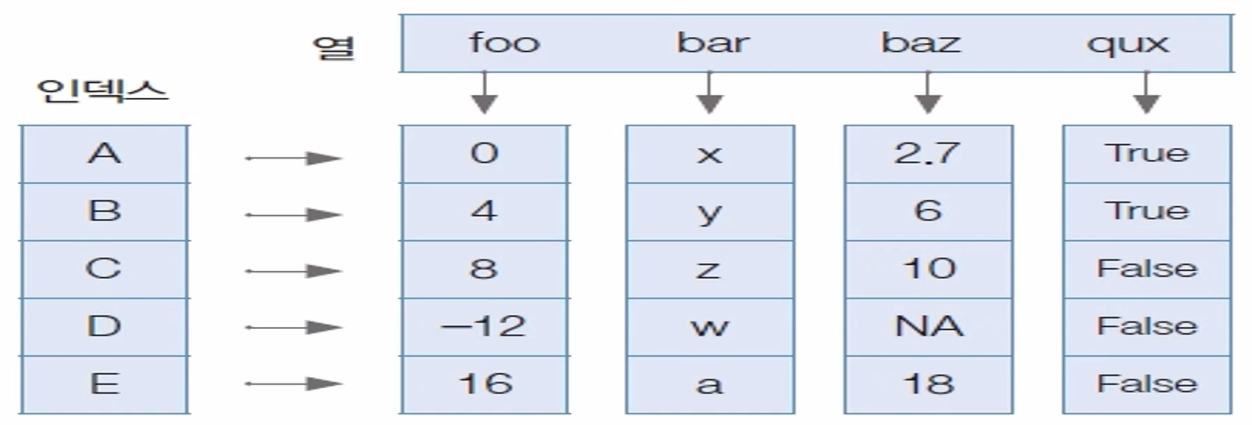

## 데이터프레임 생성
### 데이터프레임 직접 생성
* 딕셔너리 타입 데이터에서 Key는 열이름, Value는 스쿼스형 데이터 타입을 넣어 각 열의 데이터로 만듦

In [ ]:
stu1 = {'나이': 15, '성별': '남', '학교': '덕영중'}
stu2 = {'나이': 17, '성별': '여', '학교': '수리고'}
pd.DataFrame(data=[stu1, stu2], index=['준서', '예은'])

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리고


In [ ]:
# dictionary > DataFrame
datas = {'나이': [15, 17], '성별': ['남', '여'], '학교': ['덕영중', '수리고']}
pd.DataFrame(datas, index=['준서', '예은'])

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리고


In [ ]:
# List > DataFrame
datas = [[15, '남', '덕영중'], [17, '여', '수리고']]
df = pd.DataFrame(datas, index=['준서', '예은'], columns=['나이', '성별', '학교'])

In [ ]:
df

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리고


* 행 인덱스/열 이름 지정하여, 데이터프레임 만들기

In [ ]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
            'age': [42, 52, 36, 24, 73],
            'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])

In [ ]:
df

,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


In [ ]:
print(df.index)  # 행 인덱스 확인
print(df.columns)   # 전체열 이름 확인
print(df.columns[1])  #2열의 이름 확인

RangeIndex(start=0, stop=5, step=1)
Index(['first_name', 'last_name', 'age', 'city'], dtype='object')
last_name


* 데이터 생성시, 열 이름을 한정하면 해당 열만 추출

In [ ]:
pd.DataFrame(raw_data, columns = ['age', 'city'])

,age,city
0,42,San Francisco
1,52,Baltimore
2,36,Miami
3,24,Douglas
4,73,Boston


* 데이터가 존재하지 않는 열을 추가하면 해당 열에는 NaN 값들 추가

In [ ]:
pd.DataFrame(raw_data, columns=['first_name', 'last_name', 'age', 'city', 'dabt'])

,first_name,last_name,age,city,dabt
0,Jason,Miller,42,San Francisco,NaN
1,Molly,Jacobson,52,Baltimore,NaN
2,Tina,Ali,36,Miami,NaN
3,Jake,Milner,24,Douglas,NaN
4,Amy,Cooze,73,Boston,NaN


## 데이터프레임 변경

* 행 인덱스, 열 이름 재설정

In [ ]:
df.index = ['student1', 'student2', 'student3', 'student4', 'student5']
df.columns = ['이름', '성', '나이', '지역']
print(df)  # 데이터프레임 출력
print(df.index)  # 행 인덱스 확인
print(df.columns)  # 열 이름 확인

             이름         성  나이             지역
student1  Jason    Miller  42  San Francisco
student2  Molly  Jacobson  52      Baltimore
student3   Tina       Ali  36          Miami
student4   Jake    Milner  24        Douglas
student5    Amy     Cooze  73         Boston
Index(['student1', 'student2', 'student3', 'student4', 'student5'], dtype='object')
Index(['이름', '성', '나이', '지역'], dtype='object')


* 변경하고 싶은 행, 인덱스 지정해서 변경 
** rename() : 원본 객체를 변경하려면 inplace=True 옵션 사용

In [ ]:
df.rename(columns={'나이': '연령', '지역': '도시', '성': 'In', '이름': 'fn'}, inplace=True) #inplace=True로 설정하면 원본 변경
print(df)

             fn        In  연령             도시
student1  Jason    Miller  42  San Francisco
student2  Molly  Jacobson  52      Baltimore
student3   Tina       Ali  36          Miami
student4   Jake    Milner  24        Douglas
student5    Amy     Cooze  73         Boston


In [ ]:
df.rename(index={'student1': '학생1', 'student2': '학생2'}, inplace=True)
print(df)

             fn        In  연령             도시
학생1       Jason    Miller  42  San Francisco
학생2       Molly  Jacobson  52      Baltimore
student3   Tina       Ali  36          Miami
student4   Jake    Milner  24        Douglas
student5    Amy     Cooze  73         Boston


In [ ]:
df.rename({'student3': '학생3'}, axis=0, inplace=True)
print(df)

             fn        In  나이             도시
학생1       Jason    Miller  42  San Francisco
학생2       Molly  Jacobson  52      Baltimore
학생3        Tina       Ali  36          Miami
student4   Jake    Milner  24        Douglas
student5    Amy     Cooze  73         Boston


In [ ]:
df.rename({'student4': '학생4'}, inplace=True)  # default는 axis=0
print(df)

             fn        In  나이             도시
학생1       Jason    Miller  42  San Francisco
학생2       Molly  Jacobson  52      Baltimore
학생3        Tina       Ali  36          Miami
학생4        Jake    Milner  24        Douglas
student5    Amy     Cooze  73         Boston


In [ ]:
df.rename({'연령': '나이'}, axis=1, inplace=True)
print(df)

             fn        In  나이             도시
학생1       Jason    Miller  42  San Francisco
학생2       Molly  Jacobson  52      Baltimore
학생3        Tina       Ali  36          Miami
학생4        Jake    Milner  24        Douglas
student5    Amy     Cooze  73         Boston


## 행/열 삭제
 * drop() <br>축 옵션으로 axis=0을 입력하면 행 삭제(생략가능),
 축옵션 axis=1을 입력하면 열을 삭제한다.<br>동시에 여러 개의 행 또는 열을 삭제하려면, 리스트 형태로 입력한다.  
 원본을 변경하지 않고 새로운 객체를 반환하기 때문에 원본 객체를 변경하려면 inplace=True 옵션 사용

In [ ]:
exam_data={'수학':[90,80,70], '영어':[98, 89, 95],'음악':[85, 95, 100], '체육':[100, 90,90] }
df = pd.DataFrame(exam_data, index=['서준', '우현',  '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


  - 행 삭제

In [ ]:
df2 = df.copy()  #df2에 원본 데이터 복사
df2.drop('우현', inplace=True)  #df2 직접변경
df2

,수학,영어,음악,체육
서준,90,98,85,100
인아,70,95,100,90


In [ ]:
df3 = df.drop(['우현', '인아'], axis = 0) #원본에서 수정된 데이터를 바로 df3으로 받기
df3

,수학,영어,음악,체육
서준,90,98,85,100


- 열 삭제

In [ ]:
df4 = df.drop('수학', axis=1)
df4

,영어,음악,체육
서준,98,85,100
우현,89,95,90
인아,95,100,90


In [ ]:
df5 = df.drop(['영어', '음악'], axis=1)
df5

,수학,체육
서준,90,100
우현,80,90
인아,70,90


## 행/열/원소 선택

* 열 선택 : n개의 열 선택(리스트 입력)

In [ ]:
df['수학']

서준    90
우현    80
인아    70
Name: 수학, dtype: int64

In [ ]:
df[['수학']]

,수학
서준,90
우현,80
인아,70


In [ ]:
df[['수학', '영어']]

,수학,영어
서준,90,98
우현,80,89
인아,70,95


In [ ]:
df.음악

서준     85
우현     95
인아    100
Name: 음악, dtype: int64

* 행 선택
 * loc과 iloc인덱서 서용
 * 인덱스 이름을 기준으로 행을 선택할 때는 loc, 정수형 위치 인덱스를 사용할 때는 iloc
 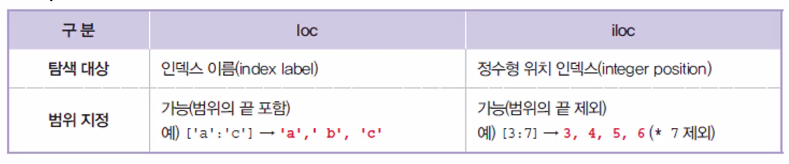

* 1개 행 선택

In [ ]:
exam_data={'수학':[90,80,70], '영어':[98, 89, 95],'음악':[85, 95, 100], '체육':[100, 90,90] }
df = pd.DataFrame(exam_data, index=['서준', '우현',  '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
df.loc['서준']

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.loc[['서준']]

,수학,영어,음악,체육
서준,90,98,85,100


In [ ]:
df.iloc[0]

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64

* 여러 개의 원소 선택(인덱스 범위 지정)

In [ ]:
df.loc['서준':'우현']

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90


In [ ]:
df.iloc[0:2]

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90


In [ ]:
df.loc['서준', '음악']

85

In [ ]:
df.iloc[0, 2]


85

In [ ]:
df.loc['서준',['음악','체육']]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.loc['서준', '음악':'체육']

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.iloc[0,[-2, -1]]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.iloc[0, -2:]

음악     85
체육    100
Name: 서준, dtype: int64

In [ ]:
df.loc[['서준', '우현'], ['음악','체육']]

,음악,체육
서준,85,100
우현,95,90


In [ ]:
df.iloc[[0,1], [2,3]]

,음악,체육
서준,85,100
우현,95,90


In [ ]:
df.iloc[:2, 2:]

,음악,체육
서준,85,100
우현,95,90


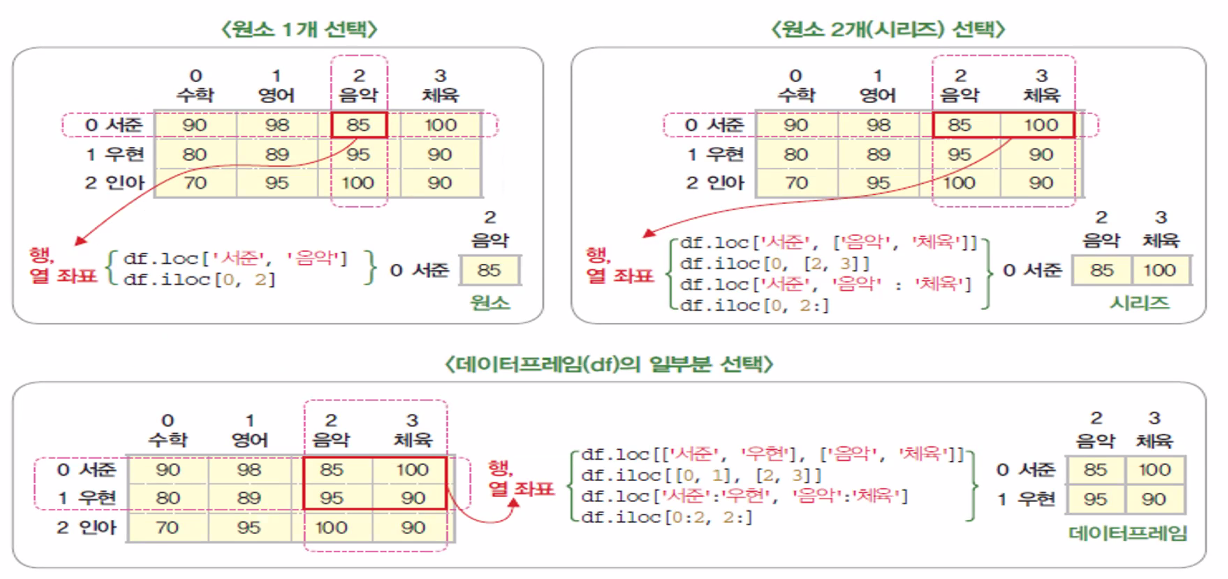

## 행/열 추가


* 열추가
 * 추가하려는 열 이름과 데이터 값을 입력. 마지막 열에 덧붙이듯 새로운 열 추가. 
 * 이때 모든 행에 동일한 값이 입력되는 점에 유의.

In [ ]:
df6 = df.copy()
df6['국어'] = 90  #BroadCasting
df6['과학'] = [80, 40, 60]
df6

,수학,영어,음악,체육,국어,과학
서준,90,98,85,100,90,80
우현,80,89,95,90,90,40
인아,70,95,100,90,90,60


* 행추가
 * 행 인덱스와 데이터 값을 loc인덱서를 사용하여 입력

In [ ]:
df7 = df.copy()
df7.loc[3] = 0
df7.loc['동규']  = [100, 90, 80, 70, 60]
df7.loc['민아'] = df7.loc['동규']
df7

,수학,영어,음악,체육,국어
서준,90,98,85,100,80
우현,80,89,95,90,80
인아,70,95,100,90,80
3,0,0,0,0,0
동규,100,90,80,70,60
민아,100,90,80,70,60


## 원소 값 변경
#### 원소를 선택하고 새로운 데이터 값을 지정

* 1개의 원소를 변경

In [ ]:
df6 = df.copy()
df6

,수학,영어,음악,체육,국어
서준,90,98,85,100,80
우현,80,89,95,90,80
인아,70,95,100,90,80


In [ ]:
df6.iloc[0, 3] = 80
df6

,수학,영어,음악,체육,국어
서준,90,98,85,80,80
우현,80,89,95,90,80
인아,70,95,100,90,80


In [ ]:
df6.loc['서준']['체육'] = 90  # Warning! ->error가 나지는 않지만 지양해야 할 방법
df6

,수학,영어,음악,체육,국어
서준,90,98,85,90,80
우현,80,89,95,90,80
인아,70,95,100,90,80


In [ ]:
df6.loc['서준', '체육'] = 100
df6

,수학,영어,음악,체육,국어
서준,90,98,85,100,80
우현,80,89,95,90,80
인아,70,95,100,90,80


In [ ]:
df6.loc['서준', ['음악', '체육']] = 50
df6

,수학,영어,음악,체육,국어
서준,90,98,50,50,80
우현,80,89,95,90,80
인아,70,95,100,90,80


In [ ]:
df6.loc['서준', ['음악', '체육']] = 90, 60
df6

,수학,영어,음악,체육,국어
서준,90,98,90,60,80
우현,80,89,95,90,80
인아,70,95,100,90,80


## 행/열의 위치 바꾸기
* 데이터 프레임의 행과 열을 서로 맞바꾸는 방법
* transpose() or 객체.T

In [ ]:
df.transpose()

,서준,우현,인아
수학,90,80,70
영어,98,89,95
음악,50,95,100
체육,50,90,90
국어,80,80,80


In [ ]:
df.transpose().T

,수학,영어,음악,체육,국어
서준,90,98,50,50,80
우현,80,89,95,90,80
인아,70,95,100,90,80


## Index 활용

* set_index() : 특정 열을 행 인덱스로 설정 

In [ ]:
exam_data={'이름': ['서준', '우현', '인아'], 
           '수학':[90,80,70], 
           '영어':[98, 89, 95],
           '음악':[85, 95, 100], 
           '체육':[100, 90,90] }
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [ ]:
ndf = df.set_index('이름')
ndf

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
ndf2 = df.set_index(['음악'])
ndf2

,이름,수학,영어,체육
음악,,,,
85,서준,90,98,100
95,우현,80,89,90
100,인아,70,95,90


In [ ]:
ndf3 = df.set_index(['수학','체육'])
ndf3

,,이름,영어,음악
수학,체육,,,
90,100,서준,98,85
80,90,우현,89,95
70,90,인아,95,100


* reindex() : 데이터 프레임의 행 인덱스를 새로운 배열로 재지정.
새로운 객체를 반환

In [ ]:
dic

{'c0': [1, 2, 3],
 'c1': [4, 5, 6],
 'c2': [7, 8, 9],
 'c3': [10, 11, 12],
 'c4': [13, 14, 15]}

In [ ]:
df = pd.DataFrame(dic, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
ndf = df.reindex(['r0', 'r1', 'r2', 'r3', 'r4'])
ndf

,c0,c1,c2,c3,c4
r0,1.0,4.0,7.0,10.0,13.0
r1,2.0,5.0,8.0,11.0,14.0
r2,3.0,6.0,9.0,12.0,15.0
r3,NaN,NaN,NaN,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.reindex(['r0', 'r1', 'r2', 'r3', 'r4'], fill_value=0)  #index의 값들을 모두 0으로 채운다.

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


In [ ]:
df.reindex(['r2', 'r1'])  #원래 있던 index를 사용할 경우 데이터가 같이 따라감.

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14


* reset_index() 
  <br>정수형 위치 인덱스로 초기화<br> 기존 행 인덱스는 열로 이동, 새로운 데이터프레임 객체를 반환


In [ ]:
ndf = df.reset_index()
ndf

,index,c0,c1,c2,c3,c4
0,r0,1,4,7,10,13
1,r1,2,5,8,11,14
2,r2,3,6,9,12,15


* 행 인덱스를 기준으로 데이터 프레임 정렬
 * sort_index() : 새롭게 정렬된 데이터프레임 객체를 반환
 * ascending 옵션 True, False 사용

In [ ]:
df.sort_index()  # default는 오름차순 정렬(ascending=True 생략)

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
df.sort_index(ascending=False)  # 내림차순 정렬

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


* 열 기준으로 데이터 프레임 정렬
 * sort_values() : 열을 기준으로 정렬,  새롭게 정렬된 데이터프레임 객체를 반환
 * ascending 옵션 True, False 사용

In [ ]:
df.sort_values('c1', ascending=False)  #c1열을 기준으로 내림차순 정렬

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


# 산술 연산

* 행/열 인덱스 기준으로 모든 원소 정렬
* 동일한 위치에 있는 원소끼리 일대일로 대응
* 일대일 대응이 되는 원소끼리 연산을 처리. 대응되는 원소가 없으면 NaN

### 시리즈 연산

* 시리즈 vs 숫자

In [ ]:
student1 = pd.Series({'국어': 100, '영어': 80, '수학':90})

In [ ]:
student1

국어    100
영어     80
수학     90
dtype: int64

In [ ]:
student1/200

국어    0.50
영어    0.40
수학    0.45
dtype: float64

In [ ]:
type(student1/200)

pandas.core.series.Series

* 시리즈 vs 시리즈
 

In [ ]:
student2 = pd.Series({'수학': 80, '국어': 90,'영어':80})

In [ ]:
print(student1)
print(student2)

국어    100
영어     80
수학     90
dtype: int64
수학    80
국어    90
영어    80
dtype: int64


In [ ]:
addition = student1 + student2
subtraction = student1 - student2
multiplication = student1 * student2
division = student1 / student2

In [ ]:
print(addition)
print(subtraction)
print(multiplication)
print(division)

국어    190
수학    170
영어    160
dtype: int64
국어    10
수학    10
영어     0
dtype: int64
국어    9000
수학    7200
영어    6400
dtype: int64
국어    1.111111
수학    1.125000
영어    1.000000
dtype: float64


* 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 > 데이터프레임)

In [ ]:
result = pd.DataFrame([addition, subtraction, multiplication, division], 
                      index =['덧셈', '뺄셈', '곱셈', '나눗셈'])

In [ ]:
result

,국어,수학,영어
덧셈,190.000000,170.000,160.0
뺄셈,10.000000,10.000,0.0
곱셈,9000.000000,7200.000,6400.0
나눗셈,1.111111,1.125,1.0


* 두 시리즈의 원소 개수가 다르거나, 혹은 시리즈의 크기가 같더라도 인덱스 값이 다를 수 있다. 
 * 이런 경우 유효한 값이 존재하지 않는다는 의미로 NaN 처리 
* 같은 인덱스가 양쪽에 모두 존재하여 서로 대응되어도 어느 한 쪽의 데이터 값이 NaN인 경우가 있다.
 * 연산의 대상인 데이터가 존재하지 않기 때문에 NaN으로 처리

In [ ]:
student1 = pd.Series({'국어': np.nan, '영어': 80, '수학':90})
student2 = pd.Series({'수학':80,'국어': 90})

In [ ]:
addition = student1 + student2
subtraction = student1 - student2
multiplication = student1 * student2
division = student1 / student2

In [ ]:
result = pd.DataFrame([addition, subtraction, multiplication, division], 
                      index =['덧셈', '뺄셈', '곱셈', '나눗셈'])

In [ ]:
result

,국어,수학,영어
덧셈,NaN,170.000,NaN
뺄셈,NaN,10.000,NaN
곱셈,NaN,7200.000,NaN
나눗셈,NaN,1.125,NaN


* 객체 사이에 공통 인덱스가 없는 경우 NaN 반환
* 이런 상황을 피하려면 연산 메소드에 fill_value 옵션 설정


In [ ]:
addition = student1.add(student2, fill_value=0)
subtraction = student1.sub(student2, fill_value=0)
multiplication = student1.mul(student2, fill_value=0)
division = student1.div(student2, fill_value=0)

In [ ]:
result = pd.DataFrame([addition, subtraction, multiplication, division], 
                      index =['덧셈', '뺄셈', '곱셈', '나눗셈'])

In [ ]:
result

,국어,수학,영어
덧셈,90.0,170.000,80.0
뺄셈,-90.0,10.000,80.0
곱셈,0.0,7200.000,0.0
나눗셈,0.0,1.125,inf


### 데이터프레임 연산

* 시리즈 연산의 확장
* 먼저 행/열 인덱스를 기준으로 정렬 후 일대일 대응되는 원소끼리 연산

* 테이터프레임과 숫자

In [ ]:
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
#df = pd.DataFrame(titanic[['age', 'fare']])
df = pd.DataFrame(titanic).loc[:, ['age', 'fare']]
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [ ]:
addition = df+10

* 데이터프레임 vs 데이터프레임

In [ ]:
addition - df

,age,fare
0,10.0,10.0
1,10.0,10.0
2,10.0,10.0
3,10.0,10.0
4,10.0,10.0
...,...,...
886,10.0,10.0
887,10.0,10.0
888,NaN,10.0
889,10.0,10.0


#데이터 입출력

## 외부 파일 읽기
* 판다스 데이터 입출력 도구
 * 판다스는 다양한 형태의 외부 파일을 데이터프레임으로 변환하는 함수 제공.
 * 데이터프레임을 다양한 유형의 파일로 저장도 가능

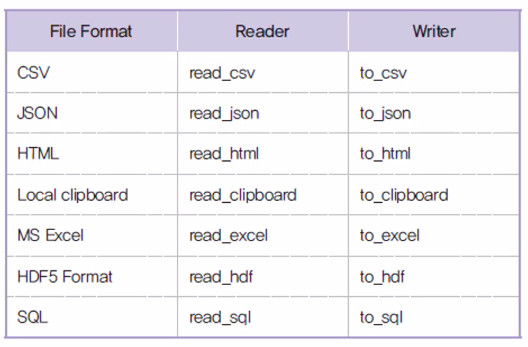

### csv 파일 

In [ ]:
file_path ="/content/read_csv_sample.csv"  # 파일 경로 지정

In [ ]:
#read_csv 함수로 cvs 파일을 데이터 프레임으로 저장
df1 = pd.read_csv(file_path)
df1

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [ ]:
df2 = pd.read_csv(file_path, header=None)  # # default 값
df2

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


In [ ]:
df3 = pd.read_csv(file_path, index_col=None)   # default 값
df3

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [ ]:
df4 = pd.read_csv(file_path,index_col='c0')
df4

,c1,c2,c3
c0,,,
0,1,4,7
1,2,5,8
2,3,6,9


### excel 파일 

In [ ]:
file_path ="/content/남북한발전전력량.xlsx"  # 파일 경로 지정

In [ ]:
#read_excel 함수로 excel 파일을 데이터 프레임으로 저장
df1 = pd.read_excel(file_path)
df1

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df2 = pd.read_excel(file_path, header=None)  # 첫번재 행이 데이터로 들어오데 됨 # default 는 header=0 (첫번째 행을 열로 지정)
df2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
2,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
3,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
4,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
5,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
6,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
7,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
8,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
9,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


### json 파일 
* JavaScript에서 유래한 데이터 공유를 목적으로 개발된 특수한 파일형식
* key : value  구조

In [ ]:
file_path = '/content/read_json_sample.json'

In [ ]:
#read_json 함수로 json 파일을 데이터 프레임으로 저장
df = pd.read_json(file_path)
df


,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


In [ ]:
df.index

Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')

In [ ]:
df.columns

Index(['name', 'year', 'developer', 'opensource'], dtype='object')

In [ ]:
df.set_index('name')

,year,developer,opensource
name,,,
,2008,Wes Mckinneye,True
,2006,Travis Oliphant,True
,2003,John D. Hunter,True


### HTML 파일
* 웹 페이지에 있는 모든 표 속성을 리스트 형식으로 가져옴

In [ ]:
url = '/content/drive/MyDrive/sample.html'

In [ ]:
tables = pd.read_html(url)

In [ ]:
len(tables)

2

In [ ]:
for x in tables:
  print(x)

   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


In [ ]:
df = tables[1]
df

,name,year,developer,opensource
0,NumPy,2006,Travis Oliphant,True
1,matplotlib,2003,John D. Hunter,True
2,pandas,2008,Wes Mckinneye,True


In [ ]:
df.set_index('name', inplace=True)

In [ ]:
df

,year,developer,opensource
name,,,
NumPy,2006,Travis Oliphant,True
matplotlib,2003,John D. Hunter,True
pandas,2008,Wes Mckinneye,True


## 데이터 저장하기

#### csv 파일로 저장
 * 판다스는 2차원 배열로 구조화된 데이터로 2차원 구조를 갖는 csv파일로 변환 가능
 * to_csv() 메소드 적용
 * CSV 파일을 저장할 파일 결로, 파일명(확장자 포함)을 따옴포 안에 입력

In [ ]:
import pandas as pd

In [ ]:
data = {'name': ['Jerry', 'Riah', 'Paul'],
        'algol': ['A', 'A+', 'B+'],
        'basic': ['C', 'B', 'B+'],
        'c++': ['B+', 'C', 'C+']}
df= pd.DataFrame(data)
df

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B+,B+,C+


In [ ]:
df.set_index('name', inplace=True)
df

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B+,B+,C+


In [ ]:
df.to_csv('df_sample.csv')

In [ ]:
ls

df_sample.csv  df_sample.json  drive/  sample_data/


#### json 파일로 저장

In [ ]:
df.to_json('df_sample.json')

In [ ]:
pd.read_json('/content/df_sample.json')

,algol,basic,c++
Jerry,A,C,B+
Riah,A+,B,C
Paul,B+,B+,C+


In [ ]:
df.to_excel('df_sample.xlsx')

#### excel 파일로 저장 
 * openpyxl 라이브러리를 사전에 설치(아나콘다 배포판에는 openpyxl 라이브러리가 기본 제공)

In [ ]:
#openpyxl 모듈 설치
!pip install --y openpyxl


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --y


In [ ]:
pd.read_excel('/content/df_sample.xlsx')

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B+,B+,C+


In [ ]:
ls

df_sample.csv  df_sample.json  df_sample.xlsx  drive/  sample_data/


* 여러개의 데이터프레임을 하나의 Excel 파일로 저장

In [ ]:
df1 = df.copy()
exam_data={'이름': ['서준', '우현', '인아'], 
           '수학':[90,80,70], 
           '영어':[98, 89, 95],
           '음악':[85, 95, 100], 
           '체육':[100, 90,90] }
df2 = pd.DataFrame(exam_data)

In [ ]:
writer = pd.ExcelWriter('df_excelwriter.xlsx')

In [ ]:
df1.to_excel(writer, sheet_name='sheet1')
df2.to_excel(writer, sheet_name='sheet2')
writer.save()

In [ ]:
ls

df_excelwriter.xlsx  df_sample.json  drive/
df_sample.csv        df_sample.xlsx  sample_data/


# 데이터 살펴보기

### 데이터 내용 미리보기

In [ ]:
df_auto = pd.read_csv('/content/drive/MyDrive/ Encore Prac/auto-mpg.csv', header=None)
df_auto.columns =['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


* head(n) : 처음 n개 행을 보여줌
* tail(n) : 마지막 n개 행을 보여줌
* default : n=5

In [ ]:
df_auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [ ]:
df_auto.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


### 데이터 요약 정보 확인하기
 * 데이터 프레임의 크기(행, 열) : shape 속성
 * 데이터 프레임의 기본 정보 : info()

In [ ]:
df_auto.shape

(398, 9)

In [ ]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df_auto.dtypes  #데이터프레임 자료형 확인

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [ ]:
df_auto['mpg'].dtypes  #한 열에 대한 자료형 확인

dtype('float64')

* 기술 통계 정보 요약 
 * describe()

In [ ]:
df_auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


### 데이터 개수 확인
 * 각 열의 데이터 개수 
   * 각 열이ㅣ 가지고 있는 원소 개수 확인 및 결과의 타입 확인(count)
   * 열 데이터의 고유값 개수 : value_counts()

In [ ]:
df_auto.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64

In [ ]:
df_auto.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [ ]:
df_auto.mpg.value_counts()  #빈도수가 높은 순서대로 반환

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

In [ ]:
df_auto.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [ ]:
type(df_auto.origin.value_counts())

pandas.core.series.Series

### 통계함수 적용

* 평균값 (모든 열 /  특정 열)

In [ ]:
df_auto.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_auto.mpg.mean()

23.514572864321607

In [ ]:
df_auto[['mpg','weight']].mean()

mpg         23.514573
weight    2970.424623
dtype: float64

* 중간값, 최대값, 최소값, 표준편차

In [ ]:
df_auto.median()

mpg               23.0
cylinders          4.0
displacement     148.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [ ]:
df_auto.max()

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                     ?
weight                    5140.0
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object

In [ ]:
df_auto.min()

mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                        100.0
weight                           1613.0
acceleration                        8.0
model year                           70
origin                                1
name            amc ambassador brougham
dtype: object

In [ ]:
df_auto.std()

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [ ]:
print(df.mpg.median())
print(df.mpg.max())
print(df.mpg.min())
print(df.mpg.std())

23.0
46.6
9.0
7.815984312565782


* 상관계수
 * 산술 데이터를 갖는 모든 열에 대해 2개씩 서로 짝을 짓고, 각각의 경우에 대해 상관계수 계산
 * 모든 열의 상관계수 :  df.corr()
 * 특정열의 상관계수 : df['열이름'].corr()
 * 1에 가까울 수록 관계성이 높아지고, 0에 가까워질 수록 관계성이 낮아진다.
 * 양의 상관관계 : 정비례, 음의 상관관계 : 반비례

In [ ]:
df_auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [ ]:
df_auto[['mpg', 'weight']].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


### 판다스 내장 그래프 도구 활용

* 그래프를 이용한 시각화 방법은 데이터의 분포과 패턴을 파악하는 데 큰 도움
* 시리즈 또는 데이터프레임 객체에 plot() 메소드를 적용하고, kind 옵션으로 그래프 종류를 선택

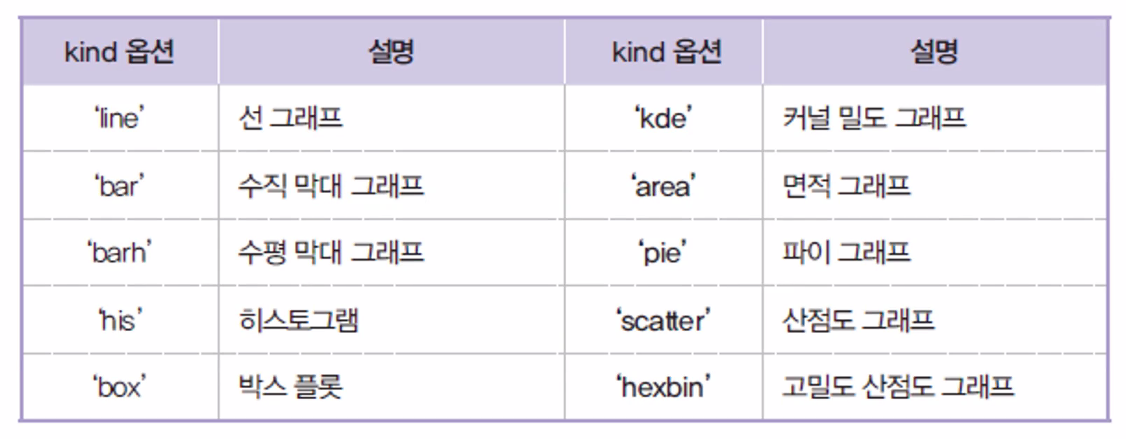

#### 선 그래프 (가장 기본 옵션)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ Encore Prac/남북한발전전력량.xlsx')
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df_ns = df.iloc[[0, 5],2:]  # 남한, 북한 발전량 합계 데이터만 추출하여 df_ns에 저장

In [ ]:
df_ns.index=['South', 'North']  # 행 index 변경
df_ns.rename({0:'Sourth', 1:'North'}, inplace=True)

In [ ]:
df_ns

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


In [ ]:
# 열이름의 자료형을 정수형으로 변경(columns.map())
df_ns.columns = df_ns.columns.map(int)

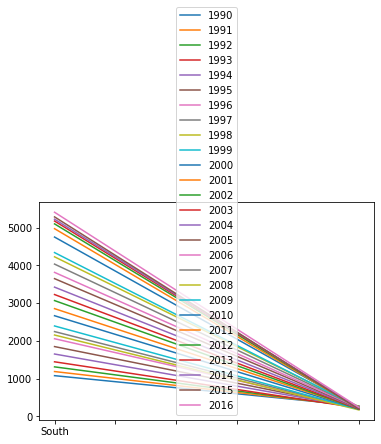

In [ ]:
# df_ns의 선그래프 그리기
df_ns.plot()

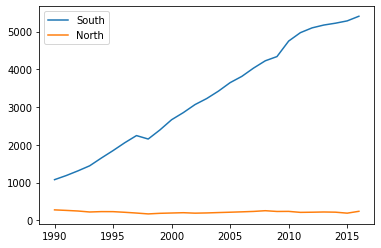

In [ ]:
# 행/열 전치해서 선 그래프 그리기
df_ns = df_ns.T
df_ns.plot()

#### 막대 그래프 

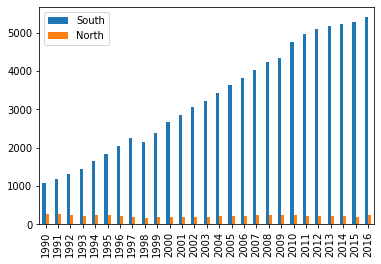

In [ ]:
# df_ns의 막대그래프 그리기
df_ns.plot(kind='bar')

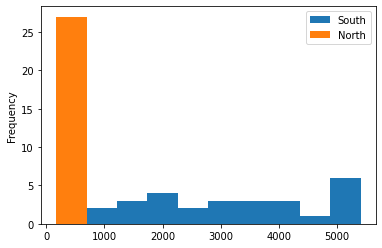

In [ ]:
df_ns.plot(kind='hist') #같은 결과값을 카운트 한 그래프

#### 산점도

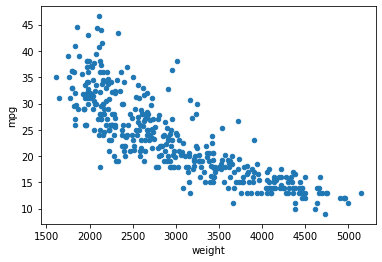

In [ ]:
# 산점도 : 두 변수의 관계를 점의 분포로 나타낸다
df_auto.plot(x='weight', y='mpg', kind='scatter') #x축, y축 지정

#### 박스 플롯
 * 특정 변수의 데이터 분포와 분산 정도에 대한 정보 제공

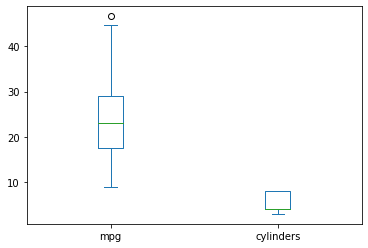

In [ ]:
df_auto[['mpg', 'cylinders']].plot(kind='box')